# Investigating Netflix Movies

## Part1

Perform exploratory data analysis on the netflix_data.csv data to understand more about movies from the 1990s decade.

In [2]:
import pandas as pd

dataset = pd.read_csv('netflix_data.csv')
dataset = dataset[dataset['type'] == 'Movie']
dataset.describe()

,release_year,duration
count,5377.000000,5377.000000
mean,2012.920030,99.307978
std,9.663282,28.530881
min,1942.000000,3.000000
25%,2012.000000,86.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [3]:
print('duplicated titles:', dataset['title'].duplicated().sum(), '\n')
print('Null count:', dataset.isnull().sum(), sep='\n')


duplicated titles: 0 

Null count:
show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
duration          0
description       0
genre             0
dtype: int64


- What was the most frequent movie duration in the 1990s? 

In [4]:
filtered_dataset = dataset[(1990 <= dataset['release_year']) & (dataset['release_year'] <= 1999)]
filtered_dataset['duration'].value_counts()

duration
94     8
101    6
108    5
93     5
95     5
      ..
83     1
138    1
141    1
100    1
191    1
Name: count, Length: 95, dtype: int64

- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [5]:
short_movie_count = filtered_dataset[
    (filtered_dataset['duration'] < 90) & (filtered_dataset['genre'] == 'Action')].shape[0]
print('Short movie count:', short_movie_count)

Short movie count: 8


## Part 2

Objective:  
To determine whether the average duration of movies on Netflix has been declining over the years.
1. What does this trend look like over a longer period of time?
2. Is this explainable by something like the genre of entertainment?


<Axes: title={'center': 'Throughout whole release year'}, xlabel='release_year'>

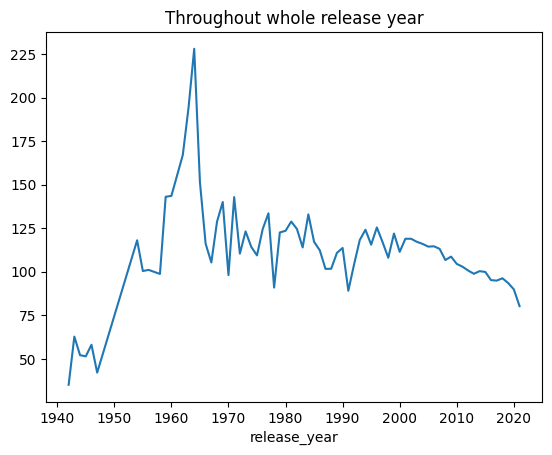

In [6]:
dataset.groupby('release_year')['duration'].mean().plot(title='Throughout whole release year')

<Axes: title={'center': 'After 2000 year'}, xlabel='release_year'>

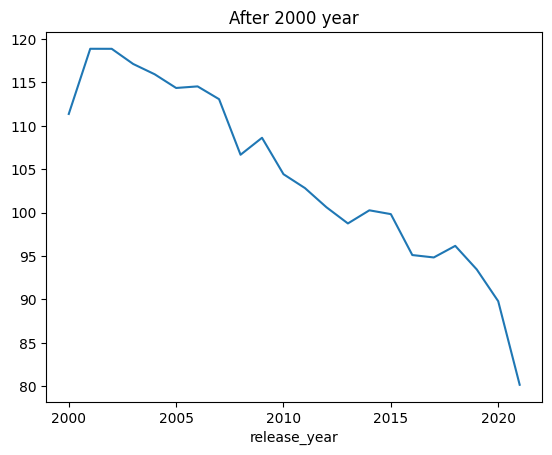

In [7]:
dataset[dataset['release_year'] >= 2000].groupby('release_year')['duration'].mean().plot(title='After 2000 year')

<Axes: title={'center': 'Average duration of movies by genre'}, xlabel='genre'>

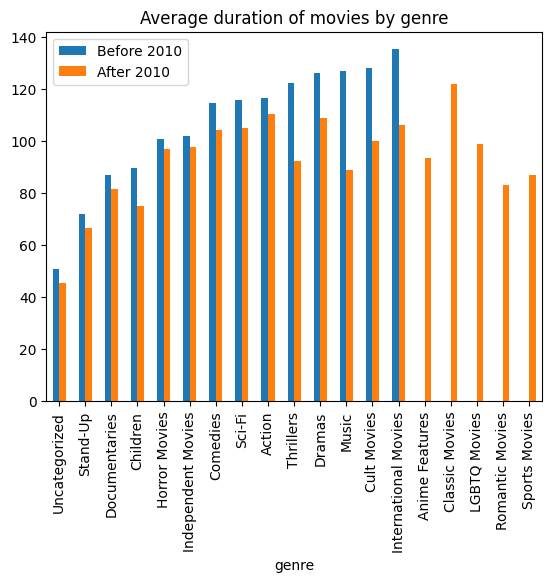

In [18]:
before_data = dataset.query('2000 <= release_year <= 2009').groupby('genre')['duration'].mean().sort_values()
after_data = dataset.query('2010 <= release_year').groupby('genre')['duration'].mean()

df = pd.concat([before_data, after_data], axis=1)
df.columns = ['Before 2010', 'After 2010']
df.plot.bar(title='Average duration of movies by genre')